In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
with_df = pd.read_excel('./reddit_reviews_tagged_enhanced.xlsx')
without_df = pd.read_excel('./reddit_reviews_tagged_enhanced_without_category_5.xlsx')

In [49]:
print(with_df.shape)
print(without_df.shape)

(1486, 11)
(1486, 11)


### EDA

<Axes: title={'center': 'Distribution of Valid and Invalid Reviews (Without Category 5)'}, ylabel='count'>

<Axes: title={'center': 'Distribution of Valid and Invalid Reviews (Without Category 5)'}, ylabel='count'>

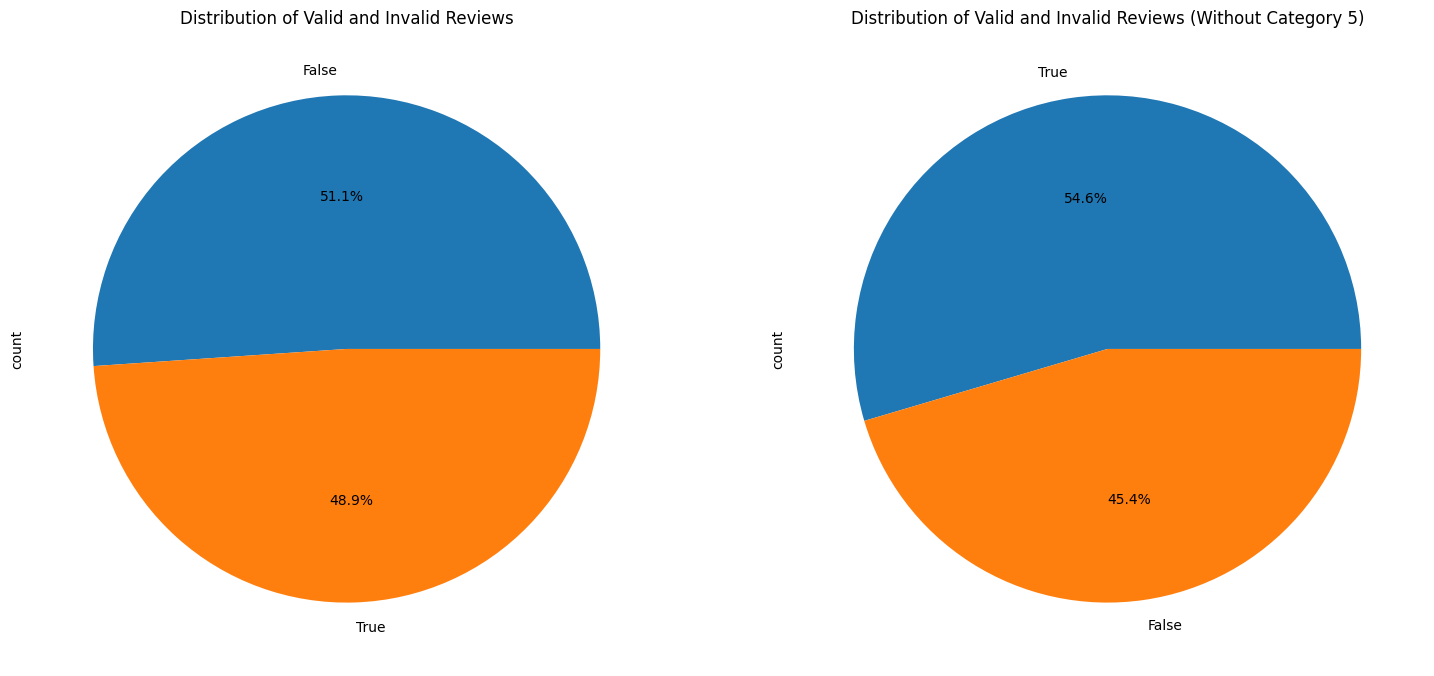

In [50]:
fig, ax = plt.subplots(1,2 , figsize=(18, 10))
with_df['is_valid'].value_counts().plot.pie(autopct='%1.1f%%', title='Distribution of Valid and Invalid Reviews', ax=ax[0])
without_df['is_valid'].value_counts().plot.pie(autopct='%1.1f%%', title='Distribution of Valid and Invalid Reviews (Without Category 5)', ax=ax[1])

In [51]:
with_df[with_df['is_valid'] == True]['purpose_classification'].value_counts()

purpose_classification
['General/Unspecified']                                                      403
['Gaming/Hobby']                                                             100
['Professional']                                                              66
['Everyday/Casual']                                                           61
['Gaming/Hobby', 'Professional']                                              23
['Academic/Education']                                                        17
['Academic/Education', 'Gaming/Hobby']                                         9
['Gaming/Hobby', 'Everyday/Casual']                                            8
['Academic/Education', 'Everyday/Casual']                                      7
['Professional', 'Gaming/Hobby']                                               6
['Academic/Education', 'Gaming/Hobby', 'Professional']                         4
['Academic/Education', 'Professional']                                         4
['Pro

In [52]:
without_df[without_df['is_valid'] == True]['purpose_classification'].value_counts()

purpose_classification
[]                                                                           341
['Everyday/Casual']                                                          197
['Gaming/Hobby']                                                             105
['Professional']                                                              70
['Gaming/Hobby', 'Professional']                                              26
['Academic/Education']                                                        14
['Gaming/Hobby', 'Everyday/Casual']                                           12
['Academic/Education', 'Gaming/Hobby']                                         8
['Academic/Education', 'Everyday/Casual']                                      7
['Professional', 'Everyday/Casual']                                            6
['Everyday/Casual', 'Professional']                                            4
['Academic/Education', 'Gaming/Hobby', 'Everyday/Casual']                      4
['Aca

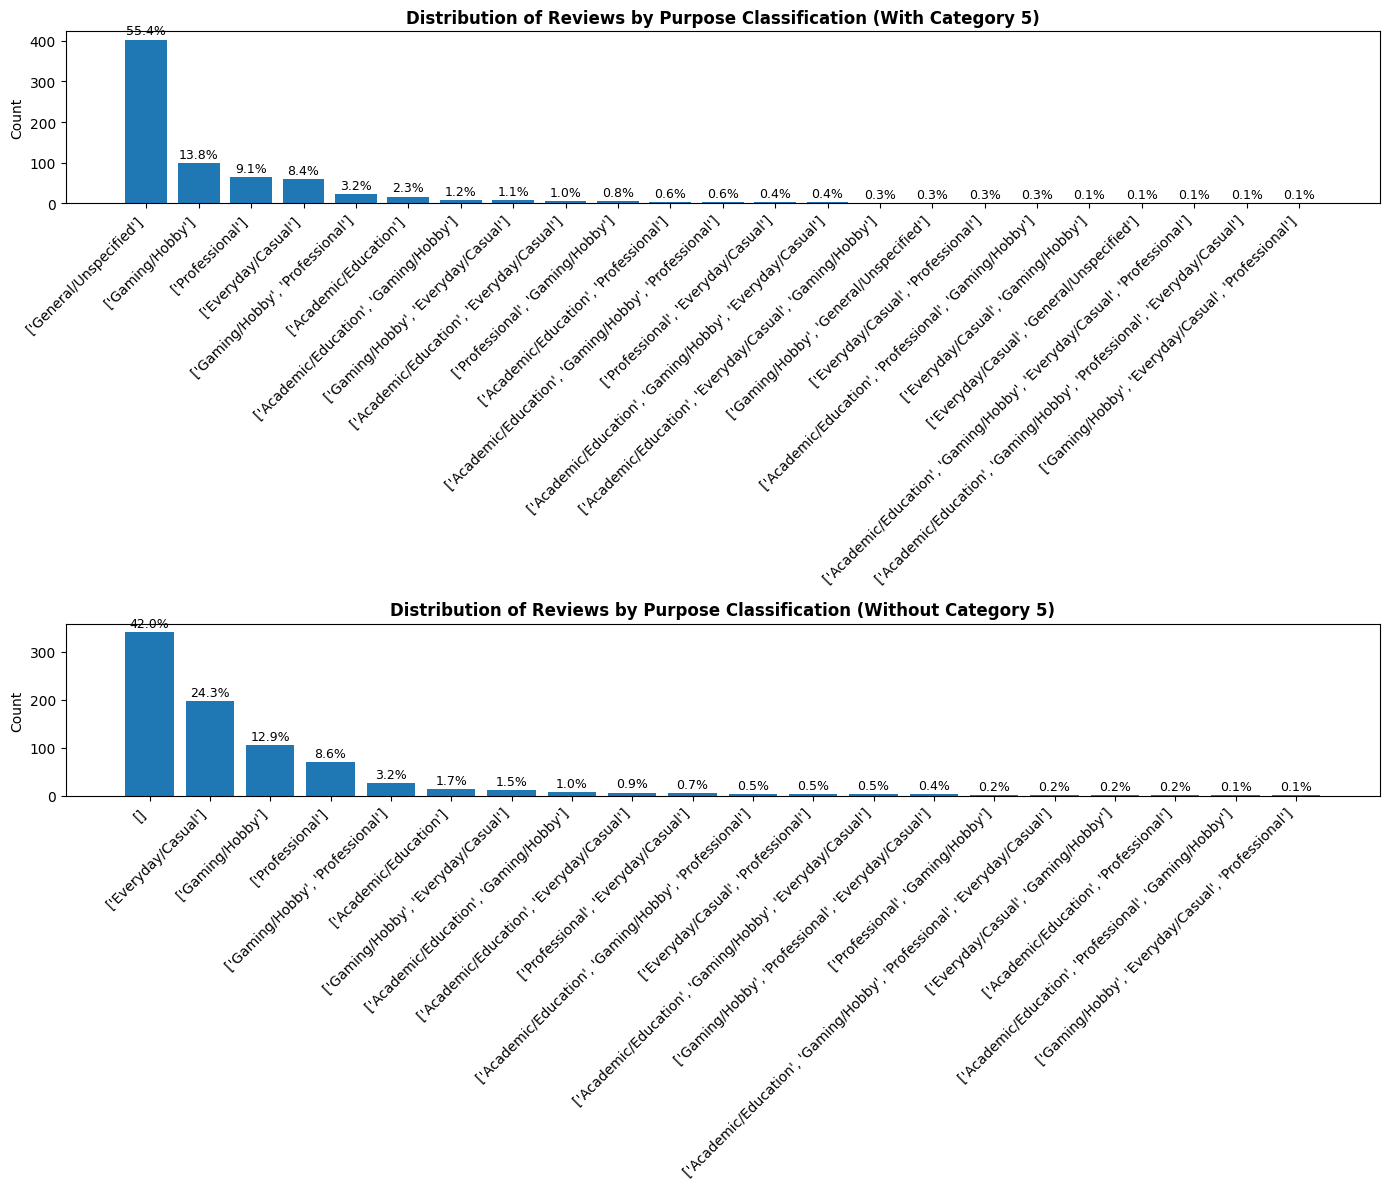

In [53]:
# 유효한 리뷰만 필터링
with_filtered_df = with_df[with_df['is_valid'] == True].copy()
without_filtered_df = without_df[without_df['is_valid'] == True].copy()

# 카테고리별 분포 시각화 (Subplots)
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# with_df 그래프
with_counts = with_filtered_df['purpose_classification'].value_counts()
with_counts_sorted = with_counts.sort_values(ascending=False)
bars1 = ax[0].bar(range(len(with_counts_sorted)), with_counts_sorted.values)
ax[0].set_xticks(range(len(with_counts_sorted)))
ax[0].set_xticklabels(with_counts_sorted.index, rotation=45, ha='right')
ax[0].set_title('Distribution of Reviews by Purpose Classification (With Category 5)', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Count')

# 비율 표시 (with_df)
total_with = with_counts_sorted.sum()
for i, (bar, value) in enumerate(zip(bars1, with_counts_sorted.values)):
    percentage = (value / total_with) * 100
    ax[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
               f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# without_df 그래프
without_counts = without_filtered_df['purpose_classification'].value_counts()
without_counts_sorted = without_counts.sort_values(ascending=False)
bars2 = ax[1].bar(range(len(without_counts_sorted)), without_counts_sorted.values)
ax[1].set_xticks(range(len(without_counts_sorted)))
ax[1].set_xticklabels(without_counts_sorted.index, rotation=45, ha='right')
ax[1].set_title('Distribution of Reviews by Purpose Classification (Without Category 5)', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Count')

# 비율 표시 (without_df)
total_without = without_counts_sorted.sum()
for i, (bar, value) in enumerate(zip(bars2, without_counts_sorted.values)):
    percentage = (value / total_without) * 100
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
               f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [54]:
_without_df = without_df[without_df['purpose_classification'] != '[]']

In [57]:
without_df[without_df['is_valid'] == True].shape

(811, 11)

In [55]:
470 / 1486 * 100

31.62853297442799

In [58]:
without_df[(without_df['is_valid'] == True) & (without_df['purpose_classification'] != '[]')].shape

(470, 11)

In [59]:
811 - 470

341

/var/folders/cg/w5448dgs6vgg_kqyxn1mmxd80000gn/T/ipykernel_87933/155665280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=_without_df, x='purpose_classification', order=order, palette=palette)


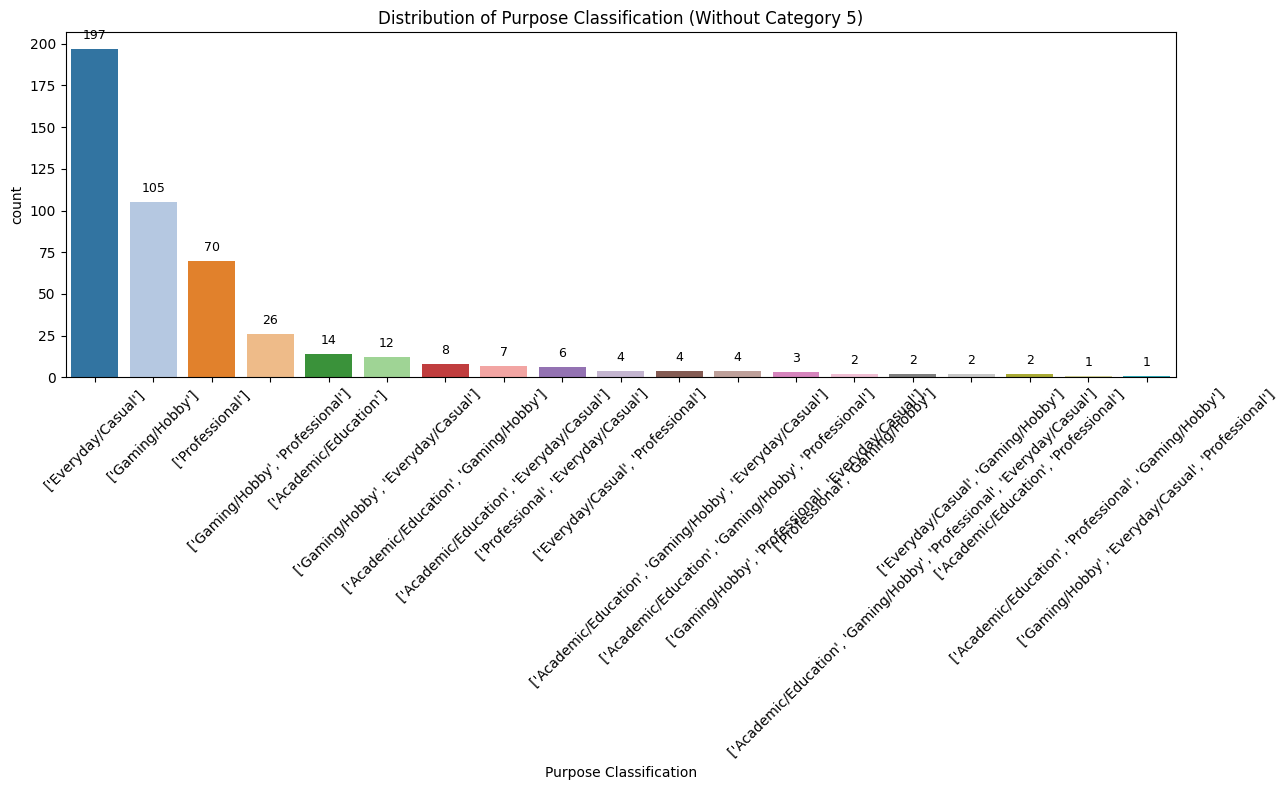

In [63]:
plt.figure(figsize=(13,8))
order = _without_df['purpose_classification'].value_counts().index
palette = sns.color_palette('tab20', n_colors=len(order))
ax = sns.countplot(data=_without_df, x='purpose_classification', order=order, palette=palette)
plt.title("Distribution of Purpose Classification (Without Category 5)")
plt.xlabel("Purpose Classification")
plt.xticks(rotation=45)
# 각 막대 위에 개수 표시
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9, xytext=(0,5), textcoords='offset points')
plt.tight_layout()
plt.show()